# 1. Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## 2. Load DarkNet

In [ ]:
!ls -la "/content/gdrive/MyDrive/Darknet"

total 16
drwx------ 2 root root 4096 Sep 19 09:55 bin
drwx------ 2 root root 4096 Sep 19 10:04 cfg
drwx------ 2 root root 4096 Sep 19 10:04 data
drwx------ 2 root root 4096 Sep 19 10:01 weights


In [ ]:
# Colab VM에 darknet 폴더를 만든다.
import os
if not os.path.exists('darknet'):
    os.makedirs('darknet')
%cd darknet
%ls

/content/darknet


In [ ]:
# 1.Verify that the compiled Darknet exists in the Google drive.
!ls -la '/content/gdrive/MyDrive/Darknet/bin/darknet'

# 2.Copy the Darknet compiled version to the VM
!cp '/content/gdrive/MyDrive/Darknet/bin/darknet' ./darknet

# 3.Set execution permissions
!chmod +x ./darknet

-rw------- 1 root root 6845400 Sep 19 09:55 /content/gdrive/MyDrive/Darknet/bin/darknet


# 3. Test Yolo

In [ ]:
# 내 구글 드라이브에 있는 필요한 파일을 VM으로 가져온다.
!cp -r '/content/gdrive/MyDrive/Darknet/weights' .
!cp -r '/content/gdrive/MyDrive/Darknet/cfg' .
!cp -ar '/content/gdrive/MyDrive/Darknet/data' .
!cp -r '/content/gdrive/MyDrive/Custom_YOLO3/custom' .

# VM의 darknet 폴더에 backup 폴더를 만든다.
if not os.path.exists('./backup'):
    os.makedirs('./backup')

%ls

backup/  cfg/  custom/  darknet*  data/  weights/


In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104

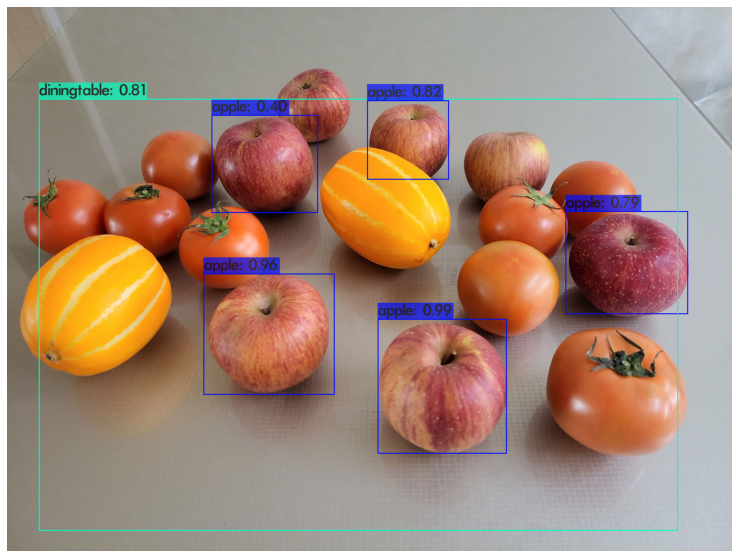

In [ ]:
!./darknet detect cfg/yolov3.cfg weights/yolov3.weights '/content/gdrive/MyDrive/Custom_YOLO3/dataset/fruit04.jpg'
imShow('predictions.jpg')

# 4. Custom Yolo Training and Test

In [ ]:
# Custom Yolo Training
!./darknet detector train custom/custom_data.data custom/custom-train-yolo3.cfg weights/darknet53.conv.74 -dont_show -map

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.004704, iou_loss = 0.000000, total_loss = 0.004704 
 total_bbox = 315240, rewritten_bbox = 0.001586 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.853426), count: 3, class_loss = 0.352459, iou_loss = 0.126731, total_loss = 0.479190 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.100336, iou_loss = 0.000000, total_loss = 0.100336 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000822, iou_loss = 0.000000, total_loss = 0.000822 
 total_bbox = 315243, rewritten_bbox = 0.001586 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.846765), count: 2, class_loss = 0.083874, iou_loss = 0.051592, total_loss = 0.135467 
v3 (mse loss, Normal

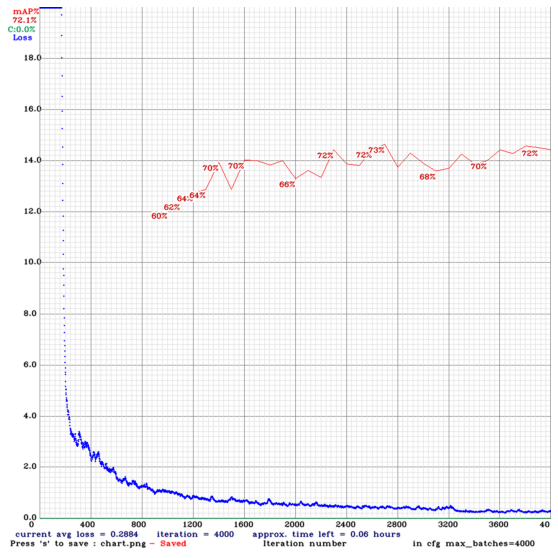

In [ ]:
# 학습현황 확인
imShow('chart_custom-train-yolo3.png')

In [ ]:
# 학습된 weight 파일 성능 측정(mAP)
!./darknet detector map custom/custom_data.data custom/custom-train-yolo3.cfg backup/custom-train-yolo3_last.weights -points 0

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 10

In [ ]:
# 성능(mAP)이 가장 좋은 weight만 남겨 두고 구글 드라이브에 복사해 둔다.
if os.path.exists('./backup'):
    !cp -r ./backup "/content/gdrive/MyDrive/Custom_YOLO3/backup"
    !cp chart_custom-train-yolo3.png "/content/gdrive/MyDrive/Custom_YOLO3/backup"  

if not os.path.exists('./backup'):
    os.makedirs('./backup')
    !cp -r "/content/gdrive/MyDrive/Custom_YOLO3/backup/custom-train-yolo3_final.weights" ./backup

In [ ]:
!ls -al ./backup

total 1683768
drwxr-xr-x 2 root root      4096 Sep 19 12:29 .
drwxr-xr-x 7 root root      4096 Sep 19 10:16 ..
-rw-r--r-- 1 root root 246305388 Sep 19 10:47 custom-train-yolo3_1000.weights
-rw-r--r-- 1 root root 246305388 Sep 19 11:22 custom-train-yolo3_2000.weights
-rw-r--r-- 1 root root 246305388 Sep 19 11:53 custom-train-yolo3_3000.weights
-rw-r--r-- 1 root root 246305388 Sep 19 12:29 custom-train-yolo3_4000.weights
-rw-r--r-- 1 root root 246305388 Sep 19 11:43 custom-train-yolo3_best.weights
-rw-r--r-- 1 root root 246305388 Sep 19 12:29 custom-train-yolo3_final.weights
-rw-r--r-- 1 root root 246305388 Sep 19 12:29 custom-train-yolo3_last.weights


 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104

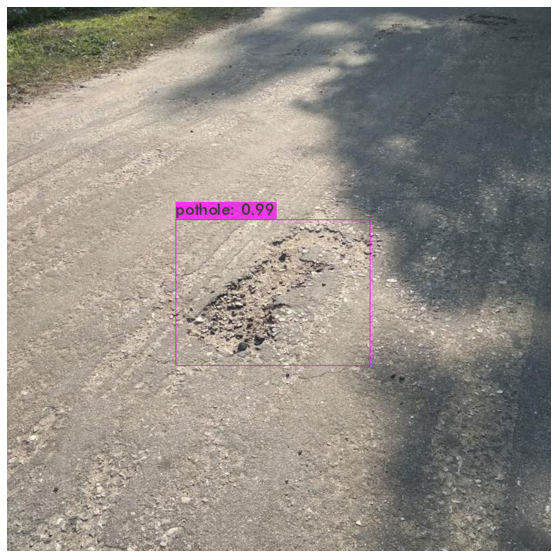

In [ ]:
# Custom Yolo3 Test
!./darknet detector test custom/custom_data.data custom/custom-test-yolo3.cfg backup/custom-train-yolo3_final.weights '/content/gdrive/MyDrive/Custom_YOLO3/dataset/fruit04.jpg' -dont-show -thresh 0.3

imShow('predictions.jpg')